In [5]:
import numpy as np
from numpy import linalg as LA
import time, random
import matplotlib.pyplot as plt

# <center>Cost Function and Gradient as Matrix Multiplication</center>

We defined our function as $J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}[(\tilde{X}\theta-Y)_{i}]^2$. Rewritten explicitly with sums and products we obtain

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}\biggl[\biggl[\sum_{j=1}^{n}x_{ij}\theta_j\biggl]-y_i\biggl]^2$$

As such, we can calculate the $k^{th}$ derivative of $J$ to be:

$$\frac{\partial J}{\partial\theta_k} = \frac{1}{m}\sum_{i=1}^{m} x_{ik}\biggl[\biggl[\sum_{j=1}^{n}x_{ij}\theta_j\biggl]-y_i\biggl]$$

$$ =\frac{1}{m}\sum_{i=1}^{m} x_{ik}[\tilde{X}\theta-Y]_i $$

$$ = \frac{1}{m}(x_{*,k})^t[\tilde{X}\theta-Y]$$

But ths partial derivative is the $k^{th}$ entry of the gradient vector. It follows that

$$\nabla J = \frac{1}{m}(\tilde{X})^t[\tilde{X}\theta-Y]$$

In [6]:
def calculateCost(X,Y, theta):
    return (1/2)*LA.norm(Y-X@theta)**2/len(X)

def getNewTheta(X,Y, theta, alpha = 1):
    c = X@theta-Y
    return theta-alpha*X.T@c/len(X)

In [7]:
def runLinearRegression(X,Y, theta, steps, alpha = 1, log = False):
    
    ans = theta        
    stepCount = [0]
    cost = [calculateCost(X, Y, ans)]

    for i in range(steps):
        ans = getNewTheta(X, Y, ans, alpha)
        cost.append(calculateCost(X, Y, ans))
        stepCount.append(i+1)
        
    plt.scatter(stepCount, cost)
    plt.title('Cost vs Steps')
    plt.xlabel('Steps')
    plt.ylabel('Cost')
    
    if log:
        plt.xscale('log')
        plt.yscale('log')
    
    plt.show()
        
    return ans

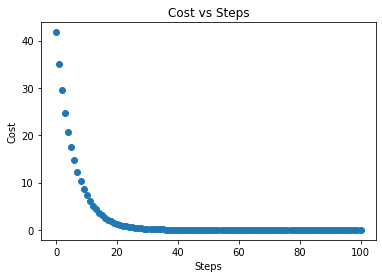

array([1.01554819, 2.99416613])

In [13]:
X = np.array([[1,1],[1,2],[1,3],[1,4]])
Y = np.array([4,7,10,13])
theta = np.array([0,0])

runLinearRegression(X, Y, theta, 100, 0.01, False)